In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##### 离群点对kmeans的影响

In [ ]:
mu_x = [0, 0, 10]
mu_y = [0, 10, 0]
delta_x = [1, 1, 1]
delta_y = [1, 1, 1]

x0 = mu_x[0] + delta_x[0] * np.random.randn(20)
y0 = mu_y[0] + delta_y[0] * np.random.randn(20)
x1 = mu_x[1] + delta_x[1] * np.random.randn(20)
y1 = mu_y[1] + delta_y[1] * np.random.randn(20)
x2 = mu_x[2] + delta_x[2] * np.random.randn(20)
y2 = mu_y[2] + delta_y[2] * np.random.randn(20)

plt.plot(x0, y0, '.')
plt.plot(x1, y1, '.')
plt.plot(x2, y2, '.')
plt.plot(50, 50, '+')
plt.axis([-10,60,-10,60])
plt.show()

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=0)

x = np.concatenate((x0, x1, x2), axis=0)
x = x.reshape(len(x), 1)
y = np.concatenate((y0, y1, y2), axis=0)
y = y.reshape(len(y), 1)
# 不带(50, 50)
data1 = np.concatenate((x, y), axis=1)
k_means.fit(data1)
pred_cls = k_means.predict(data1)
plt.scatter(x, y, c=pred_cls)
plt.show()

In [ ]:
# 带(50, 50)
x = np.concatenate((x0, x1, x2, [50]), axis=0)
x = x.reshape(len(x), 1)
y = np.concatenate((y0, y1, y2, [50]), axis=0)
y = y.reshape(len(y), 1)

data2 = np.concatenate((x, y), axis=1)
k_means.fit(data2)
pred_cls = k_means.predict(data2)
plt.scatter(x, y, c=pred_cls)
plt.show()

##### 等高线图

In [ ]:
import seaborn as sns
# 计算Minkovski距离
def Min_dist(X, Y, p):
    return np.power((np.power(np.abs(X), p) + np.power(np.abs(Y), p)), 1/p)

x = np.arange(-10, 10, 0.01)         # x轴每隔0.01取一个点
y = np.arange(-10, 10, 0.01)         # y轴每隔0.01取一个点
X, Y = np.meshgrid(x, y)             # 将原始数据变成网格数据形式

p = [0.5, 1, 1.5, 2, 2.5, 3]
plt.figure(figsize=(15, 10))
for i in range(1, 7):
    Z = Min_dist(X, Y, p[i-1])
    plt.subplot(2, 3, i)
    plt.contour(X, Y, Z, 20)
    plt.title('p='+str(p[i-1]))


##### Kmeans-1

s1和s2的相关系数：-0.0111
x1和x2的相关系数：0.8660


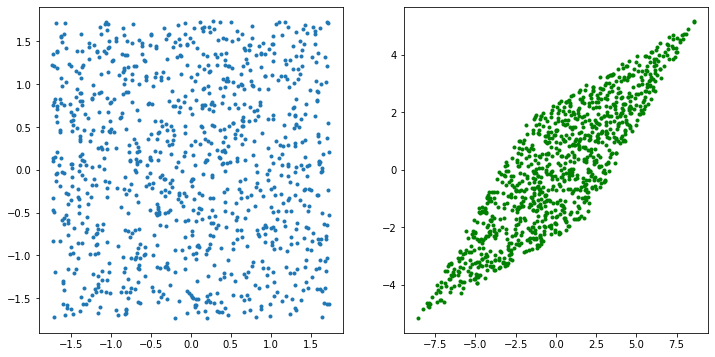

In [6]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

s1 = random.uniform(low=-np.sqrt(3), high=np.sqrt(3), size=1000)
s2 = random.uniform(low=-np.sqrt(3), high=np.sqrt(3), size=1000)
x1 = 2 * s1 + 3 * s2
x2 = 2 * s1 + 1 * s2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(s1, s2, '.')
plt.subplot(1, 2, 2)
plt.plot(x1, x2, '.', color='green')

print('s1和s2的相关系数：{:.4f}'.format(np.corrcoef(s1, s2)[0,1]))
print('x1和x2的相关系数：{:.4f}'.format(np.corrcoef(x1, x2)[0,1]))

In [8]:
import pandas as pd

s1_data = pd.DataFrame(s1)
s2_data = pd.DataFrame(s2)
x1_data = pd.DataFrame(x1)
x2_data = pd.DataFrame(x2)
s1_data.to_csv('s1_data.csv')
s2_data.to_csv('s2_data.csv')
x1_data.to_csv('x1_data.csv')
x2_data.to_csv('x2_data.csv')